# Soumitra Alate
# UBIT NAME: smalate
# UB Person Number: 50289133

In [36]:
import numpy as np
import math
import matplotlib.pyplot
from matplotlib import pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
from sklearn.metrics import confusion_matrix
from PIL import Image
import os
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from scipy.stats import mode
from sklearn.svm import SVC
from statistics import *
import itertools

In [37]:
USPSMat  = []
USPSTar  = []
curPath  = 'C:/ML/Project 3/USPSdata/USPSdata/Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
            
USPSFeatures = np.array(USPSMat)
tar =                np.array(USPSTar)
USPSTarget = np_utils.to_categorical(tar, 10)

In [38]:
def plot_confusion_matrix(cm,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    classes=[0,1,2,3,4,5,6,7,8,9]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [39]:
def GetSoftMaxValTest(VAL_FEATURE,W):
    z = (np.dot(VAL_FEATURE,np.transpose(W)))
    Y = (np.exp(z)/np.sum(np.exp(z)))
    return Y

def GetValTest(VAL_PHI,W):
    Y = np.dot(W,np.transpose(VAL_PHI))
    return Y

def GetCCE(VAL_TEST_OUT,ValDataAct): #GetCategoricalCrossEntropy
    sum = 0.0
    t=0
    accuracy = 0.0
    counter = 0
    val = 0.0
    
    for i in range (0,len(VAL_TEST_OUT)):    
        op = ValDataAct[i][np.argmax(ValDataAct[i])]
        predict = VAL_TEST_OUT[i][np.argmax(ValDataAct[i])]
        
        sum = sum-op*math.log(predict)
        
        if(np.argmax(ValDataAct[i]) == np.argmax(VAL_TEST_OUT[i])):
            counter = counter + 1
    accuracy = (float((counter*100))/float(len(VAL_TEST_OUT)))
    return (str(accuracy) + ',' +  str(math.sqrt(sum/len(VAL_TEST_OUT))))

def softMax(z):
    s_max = (np.exp(z)/np.sum(np.exp(z)))
    return s_max   

In [67]:
nb_epoch = 25
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
resize_length = 784

(trainData, trainLabel), (testData, testLabel) = mnist.load_data()

trainData = trainData.reshape(train_size,resize_length)
testData = testData.reshape(test_size,resize_length)

trainData = trainData.astype("float32")
testData = testData.astype("float32")

trainData = trainData/255
testData = testData/255

TrainingTarget = np_utils.to_categorical(trainLabel,num_classes)
TrainingData   = trainData
TestDataAct = np_utils.to_categorical(testLabel,num_classes)
TestData = testData

print(TrainingData.shape)
print(TrainingTarget.shape)
print(TestData.shape)
print(TestDataAct.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


# Logistic Regression

(10, 784)
0
1
2
3
4
5
(10000, 10)
MNIST-Accuracy 91.33
USPS-Accuracy 35.61678083904195


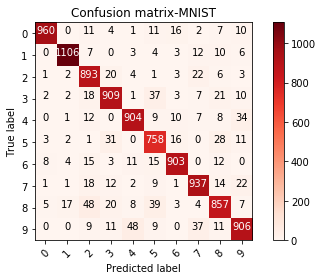

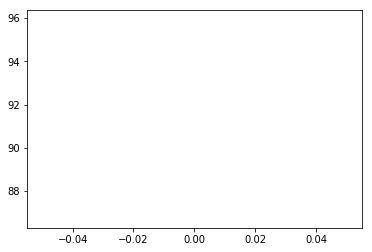

In [66]:
Wts          = np.random.normal(loc = 0.0, scale = 0.01, size = (len(TrainingTarget[0]),len(TrainingData[0])))

W_Now        = np.dot(1, Wts)
bias = np.zeros((1,1))
print(W_Now.shape)
La           = 0.0001
learningRate = 0.5
L_Erms_Val   = []
L_Erms_TR    = []
L_Erms_Test  = []
W_Mat        = []
Accuracy_Test = []
logLosses = []

batchSize = 1000

for i in range(0,6):    
    print(i)
    for j in range(0,len(TrainingData),batchSize):
        sumDelta_ED = 0
        for k in range(j, j+batchSize):
            z = (np.dot((W_Now),TrainingData[k]))  
            soft_max = softMax(z)
            error = (TrainingTarget[k] - soft_max).reshape(10,1)
            train = TrainingData[k].reshape(1,784)
            Delta_ED     = -np.dot(error,train)
            sumDelta_ED += Delta_ED
    
        Delta_E_D = (sumDelta_ED/batchSize)
        La_Delta_E_W  = np.dot(La,W_Now)
        Delta_E       = np.add(Delta_E_D,La_Delta_E_W)    
        Delta_W       = -np.dot(learningRate,Delta_E)
        W_T_Next      = W_Now + Delta_W
        W_Now         = W_T_Next

        #-----------------TrainingData Accuracy---------------------#
        TR_TEST_OUT = GetSoftMaxValTest(TrainingData,W_T_Next)
        Erms_TR       = GetCCE(TR_TEST_OUT,TrainingTarget)

        L_Erms_TR.append(float(Erms_TR.split(',')[1]))


        #-----------------TestingData Accuracy---------------------#
TEST_OUT = GetSoftMaxValTest(TestData,W_Now)
print(TEST_OUT.shape)
Erms_Test = GetCCE(TEST_OUT,TestDataAct)
L_Erms_Test.append(float(Erms_Test.split(',')[1]))
        
        #-----------------USPS--------------------------#
TEST_OUT1 = GetSoftMaxValTest(USPSFeatures,W_Now)
#         Erms_Test1 = GetCCE(TEST_OUT1,TestDataAct)
#         L_Erms_Test.append(float(Erms_Test1.split(',')[1]))
        

Accuracy_Test.append(float(Erms_Test.split(',')[0]))
      
        #----------MNIST Confusion-----------#    
cm = confusion_matrix(TEST_OUT.argmax(axis=1),TestDataAct.argmax(axis=1))
accuracy = (np.trace(cm)/len(TestDataAct))*100
plot_confusion_matrix(cm,title='Confusion matrix-MNIST')

#----------------------USPS Confusion-----------------------#
cm1 = confusion_matrix(TEST_OUT1.argmax(axis=1),USPSTarget.argmax(axis=1))
accuracy1 = (np.trace(cm1)/len(USPSTarget))*100
#plot_confusion_matrix(cm1,title='Confusion matrix-MNIST')

print("MNIST-Accuracy", accuracy)

print("USPS-Accuracy" , accuracy1)

plt.plot(L_Erms_Test)
plt.show()

plt.plot(Accuracy_Test)
plt.show()


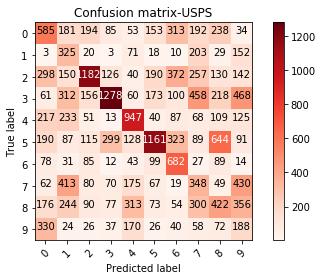

In [42]:
plot_confusion_matrix(cm1,title='Confusion matrix-USPS')

In [43]:
print ('----------Logistic Regression Solution--------------------')
#print ("M = "+str(M)+" \nLambda  = "+str(La)+" \neta= "+str(learningRate))
print ("E_rms Training   = " + str(np.around(min(L_Erms_TR),5)))
# print ("E_rms Validation = " + str(np.around(min(L_Erms_Val),5)))
print ("E_rms Testing    = " + str(np.around(min(L_Erms_Test),5)))
print ("Training Accuracy = " + (str(float(Erms_TR.split(',')[0]))))
# print ("Validation Accuracy = " + (str(float(Erms_Val.split(',')[0]))))
print ("Testing Accuracy = " + (str(float(Erms_Test.split(',')[0]))))

----------Logistic Regression Solution--------------------
E_rms Training   = 3.4758
E_rms Testing    = 3.63267
Training Accuracy = 90.91833333333334
Testing Accuracy = 91.37


# Neural Network

In [68]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
__________

In [70]:
model.compile(loss="categorical_crossentropy", optimizer="adam",metrics=["accuracy"])

In [71]:
history = model.fit(TrainingData, 
                    TrainingTarget,
                    validation_data=(TestData, TestDataAct),
                    batch_size=batch_size,
                    nb_epoch=nb_epoch,
                    verbose=2)

c:\users\soumi\onedrive\documents\python\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 7s - loss: 0.2656 - acc: 0.9215 - val_loss: 0.1045 - val_acc: 0.9689
Epoch 2/25
 - 6s - loss: 0.1060 - acc: 0.9672 - val_loss: 0.0829 - val_acc: 0.9751
Epoch 3/25
 - 6s - loss: 0.0748 - acc: 0.9768 - val_loss: 0.0711 - val_acc: 0.9773
Epoch 4/25
 - 6s - loss: 0.0576 - acc: 0.9816 - val_loss: 0.0653 - val_acc: 0.9801
Epoch 5/25
 - 7s - loss: 0.0462 - acc: 0.9849 - val_loss: 0.0614 - val_acc: 0.9811
Epoch 6/25
 - 7s - loss: 0.0410 - acc: 0.9870 - val_loss: 0.0577 - val_acc: 0.9835
Epoch 7/25
 - 6s - loss: 0.0334 - acc: 0.9890 - val_loss: 0.0640 - val_acc: 0.9814
Epoch 8/25
 - 7s - loss: 0.0300 - acc: 0.9900 - val_loss: 0.0727 - val_acc: 0.9814
Epoch 9/25
 - 6s - loss: 0.0288 - acc: 0.9901 - val_loss: 0.0629 - val_acc: 0.9834
Epoch 10/25
 - 7s - loss: 0.0260 - acc: 0.9909 - val_loss: 0.0699 - val_acc: 0.9820
Epoch 11/25
 - 7s - loss: 0.0239 - acc: 0.9917 - val_loss: 0.0610 - val_acc: 0.9844
Epoch 12/25
 - 6s - loss: 0.0213 - 

MNIST Accuracy:  98.35000000000001
USPS Accuracy:  51.60258012900645


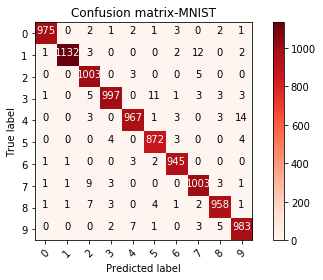

In [72]:
scores = model.evaluate(TestData, TestDataAct, verbose=0)
x = model.predict(USPSFeatures)
y = model.predict(TestData)
#print(y.shape)
#print(x)
cm = confusion_matrix(x.argmax(axis=1),USPSTarget.argmax(axis=1))
accuracy = (np.trace(cm)/len(USPSTarget))*100
#print(cm)
cm1 = confusion_matrix(y.argmax(axis=1),TestDataAct.argmax(axis=1))
accuracy1 = (np.trace(cm1)/len(TestDataAct))*100
print("MNIST Accuracy: ",accuracy1)
print("USPS Accuracy: ", accuracy)
plot_confusion_matrix(cm1,title='Confusion matrix-MNIST')

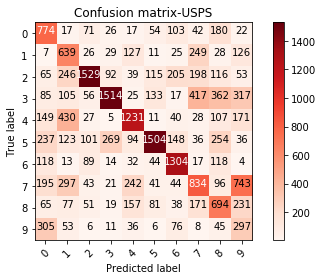

In [73]:
plot_confusion_matrix(cm,title='Confusion matrix-USPS')

In [74]:
print("MNIST Accuracy: %.2f%%" % (scores[1]*100))

MNIST Accuracy: 98.35%


# Random Forest

(10000, 10)
MNIST Accuracy:  90.51
USPS Accuracy:  15.535776788839442


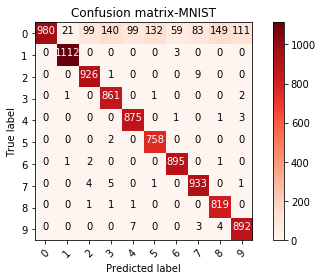

In [65]:
classifier2 = RandomForestClassifier(n_estimators=100)
classifier2.fit(TrainingData, TrainingTarget) 

#--------MNIST-------------------#
y_pred=classifier2.predict(TestData)
print(y_pred.shape)
cm = confusion_matrix(y_pred.argmax(axis=1),TestDataAct.argmax(axis=1))
accuracy = (np.trace(cm)/len(TestDataAct))*100
print("MNIST Accuracy: ",accuracy)
plot_confusion_matrix(cm,title='Confusion matrix-MNIST')

#----------USPS-----------------#
y_pred1=classifier2.predict(USPSFeatures)

cm1 = confusion_matrix(y_pred1.argmax(axis=1),USPSTarget.argmax(axis=1))
accuracy1 = (np.trace(cm1)/len(USPSTarget))*100
print("USPS Accuracy: ",accuracy1)

#plot_confusion_matrix(cm1,title='Confusion matrix')

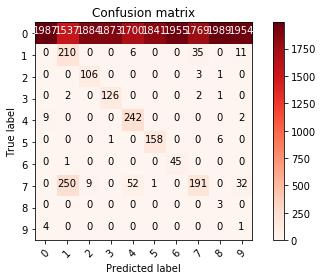

In [54]:
plot_confusion_matrix(cm1,title='Confusion matrix')

# SVM

In [86]:
TrainingData_MNIST = trainData[0:6000,]
TrainingTarget_MNIST = trainLabel[0:6000,]

TestData_MNIST = testData[0:1000,]
TestTarget_MNIST = testLabel[0:1000,]

TestData_USPS = USPSFeatures[0:10000,]
TestTarget_USPS = USPSTarget[0:10000,]

classifier3 = SVC(kernel='linear', C=2.0, gamma = 0.05);
classifier3.fit(TrainingData_MNIST, TrainingTarget_MNIST)
y_predict3=classifier3.predict(TestData_MNIST)

cm2 = confusion_matrix(y_predict3,TestTarget_MNIST)
accuracy3 = (np.trace(cm2)/len(TestTarget_MNIST))*100
print("MNIST Accuracy: ",accuracy3)


print(y_predict3.shape)


# classifier_svm_poly = SVC(kernel='poly', C=2.0, gamma = 0.05);
# classifier_svm_poly.fit(svm_TrainingData_MNIST, svm_TrainingTarget_MNIST)
# y_predict_poly=classifier_svm_poly.predict(svm_TestData_MNIST)

# classifier_svm_rbf = SVC(kernel='rbf', C=2.0, gamma = 0.05);
# classifier_svm_rbf.fit(svm_TrainingData_MNIST, svm_TrainingTarget_MNIST)
# y_predict_rbf=classifier_svm_rbf.predict(svm_TestData_MNIST)


MNIST Accuracy:  88.8
(1000,)


In [87]:
#-------------------USPS----------------------#
y_predict4=classifier3.predict(TestData_USPS)
cm1 = confusion_matrix(y_predict4,TestTarget_USPS.argmax(axis=1))
accuracy4 = (np.trace(cm1)/len(TestTarget_USPS))*100
print("USPS Accuracy: ",accuracy4)


USPS Accuracy:  40.550000000000004


# Combined Model Prediction

In [88]:
from scipy.stats import mode
# from statistics import *
import statistics

final = np.array([])
count=0

for i in range(0,10000):
    for j in range(0,10):
        try:
            mode1 = statistics.mode([y[i][j],y_pred[i][j],TEST_OUT[i][j]])
            final = np.append(final,mode1)
        except statistics.StatisticsError as e:
            final = np.append(final,TEST_OUT[i][j])
            
finalres  = final.reshape(10000,10)      
print(finalres.shape)
# print("Accuracy: "+str(metrics.accuracy_score(TestDataAct.argmax(axis=1),finalres.argmax(axis=1))))

cm=confusion_matrix(finalres.argmax(axis=1),TestDataAct.argmax(axis=1))
accuracyFinal=(np.trace(cm)/len(TestDataAct))*100
print("Accuracy", accuracyFinal)

(10000, 10)
Accuracy 92.0
